In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [2]:
data = pd.read_csv('Movie_Review.csv')

In [3]:
data.dropna(inplace=True)

In [4]:
def clean_review(review):
    str = ' '.join(word for word in review.split() if word.lower() not in stopwords.words('english'))
    return str

In [5]:
data['text'] = data['text'].apply(clean_review)

In [6]:
#wordcloud 

from wordcloud import WordCloud

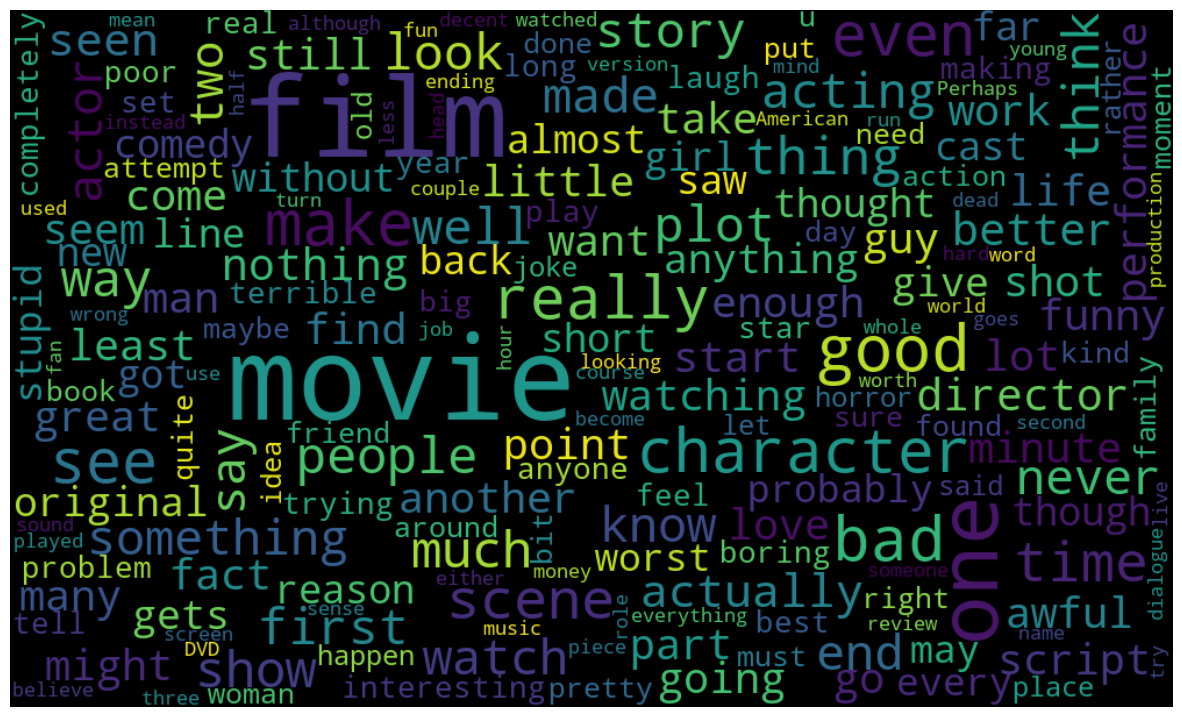

In [7]:
#draw Wordcloud
reviews = ' '.join(word for word in data['text'][data['sentiment'] == 'neg'].astype(str))
wordcloud = WordCloud(height = 600,width =1000, max_font_size = 100)
plt.figure(figsize = (15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

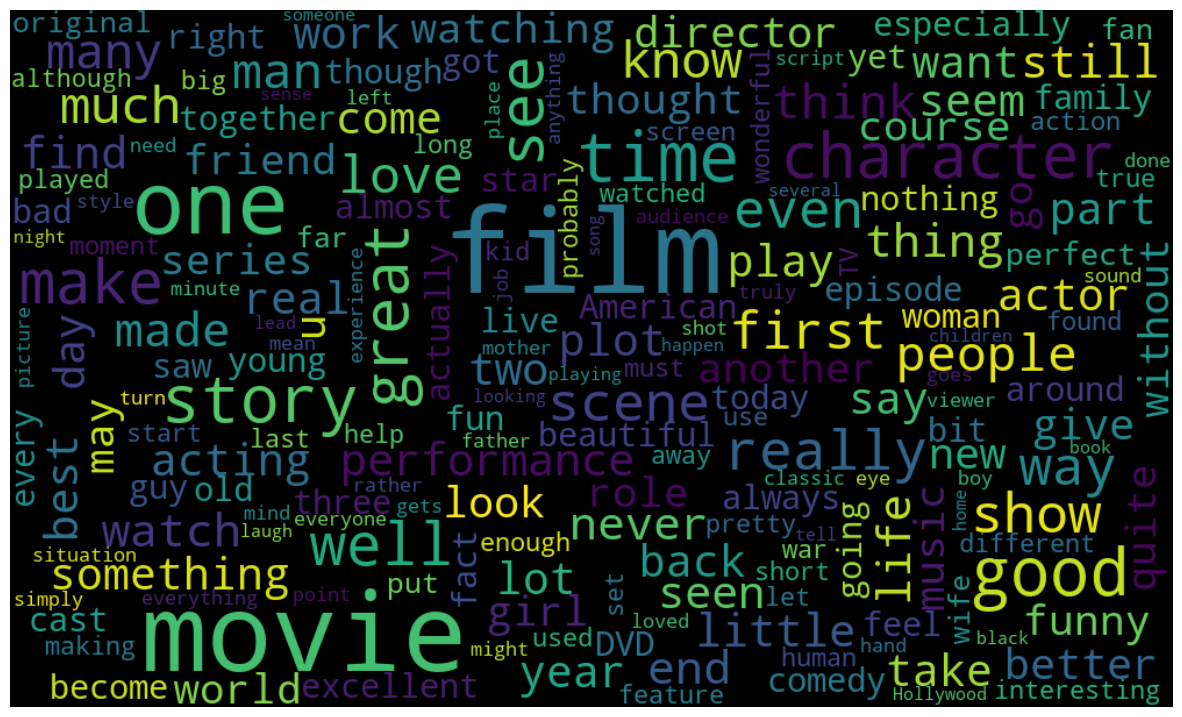

In [8]:
reviews = ' '.join(word for word in data['text'][data['sentiment']== 'pos'].astype(str))
wordcloud = WordCloud(height = 600, width = 1000, max_font_size =100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=2500)

In [10]:
reviews = cv.fit_transform(data['text']).toarray()

In [11]:
data['sentiment'] = data['sentiment'].replace(['pos','neg'],[1,0])

In [12]:
data['sentiment'].value_counts()

0    500
1    500
Name: sentiment, dtype: int64

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
model = LogisticRegression()

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
reviews_train, reviews_test, sent_train, sent_test = train_test_split(reviews, data['sentiment'], test_size=0.2)

In [17]:
model.fit(reviews_train,sent_train)

LogisticRegression()

In [18]:
predict = model.predict(reviews_test)

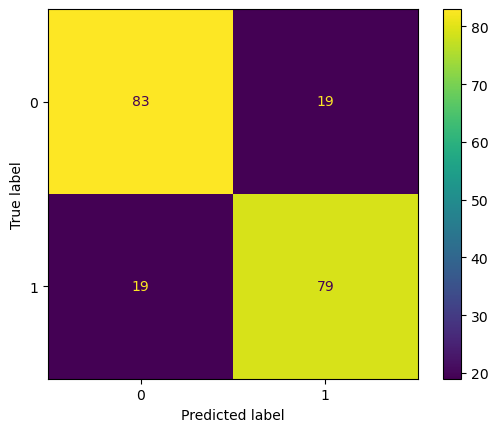

In [19]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(sent_test, predict, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
display.plot()
plt.show()

In [20]:
import pickle as pk

In [21]:
pk.dump(model,open('model.pkl','wb'))

In [22]:
pk.dump(cv,open('scaler.pkl','wb'))